<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 2 - Algorismes sobre grafs</h2>
</center>
</div>

In [70]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [71]:
import matplotlib.pylab as plt
import numpy as np
import random

## Recordatori: DFS

In [72]:
def dfs(G, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        print(current_node, end=' ')
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs(G, visited, nei)        

DFS: 0 1 2 3 4 5 6 7 8 9 

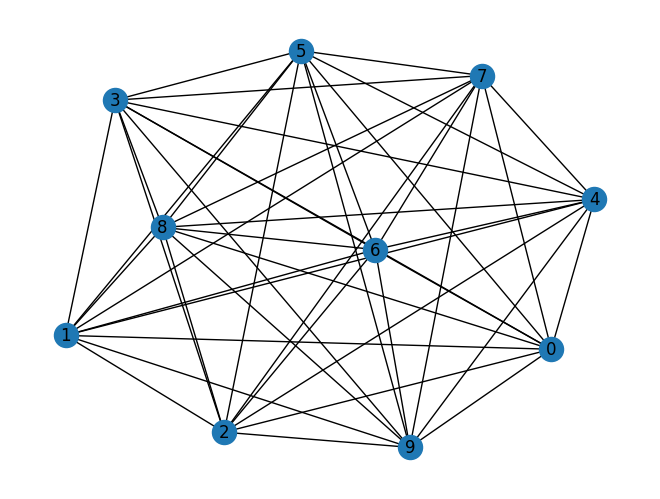

In [73]:
import networkx as nx
G = nx.random_geometric_graph(10, 3)

print('DFS: ',end='')
dfs(G, set(), 0)

nx.draw(G, with_labels=True)

## Component connexa

Sigui $G$ un graf, una __component connexa__ és un subgraf $S\subset G$ tal que, per a dos nodes qualsevols de $S$, existeix un camí dins de $S$ que els connecta i per a qualsevol parella de nodes de $G$ on $n_1\in S$, $n_2\notin S$, no existeix un camí entre $n_1$ i $n_2$.

Observeu l'exemple següent. Aquest graf té tres compoenents connexes:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" alt="image info" style="width:20%"/>

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Donat un graf, escriu un algorisme que retorni el nombre de components connexes que conté i una llista de llistes amb tots els nodes de cada component connexa.
</p>    
    
</div>

In [118]:
def dfs(G, v, visited):
    """
    Esta función implementa el algoritmo de búsqueda en profundidad (DFS) de forma recursiva,
    buscando todos los nodos de un grafo a partir de un nodo inicial.

    Args:
        G: Grafo sobre el que se realiza la búsqueda. Es un objeto de tipo networx.Graph.
        v: Nodo inicial.
        visited: Conjunto de nodos visitados.
    
    Returns:
        visited: Lista de nodos visitados.
    """

    if v not in visited:  # Comprueba que el nodo no haya sido visitado
        visited.add(v)  # Si no ha sido visitado, lo añade al conjunto de visitados

        # Busca en profundidad los vecinos del nodo actual de forma recursiva
        for u in G.neighbors(v):
            dfs(G, u, visited)

def connected_components(G):
    """
    Esta función calcula las componentes conexas de un grafo, haciendo uso de la función dfs.

    Args:
        G: Grafo sobre el que se realiza la búsqueda. Es un objeto de tipo networx.Graph.

    Returns:
        len(components): Número de componentes conexas.
        components: Lista de componentes conexas.
    """

    components = []  # Lista de componentes
    visited = set()  # Conjunto de nodos visitados

    # Iteramos sobre todos los nodos para alcanzar todas las componentes conexas
    for v in G.nodes():
        if v not in visited:  # Comprobamos que el nodo no haya sido visitado

            visited.add(v)  # Añadimos el nodo a los visitados
            
            # Visitamos su componente conexa
            component = set()
            dfs(G, v, component)
            
            # Añadimos los nodos de la componente conexa a la lista de visitados
            visited.update(component)

            # Añadimos la componente a la lista de componentes
            components.append(component)

    return len(components), components

(3, [{1, 2, 3, 4}, {8, 5, 6, 7}, {9, 10, 11, 12, 13, 14}])


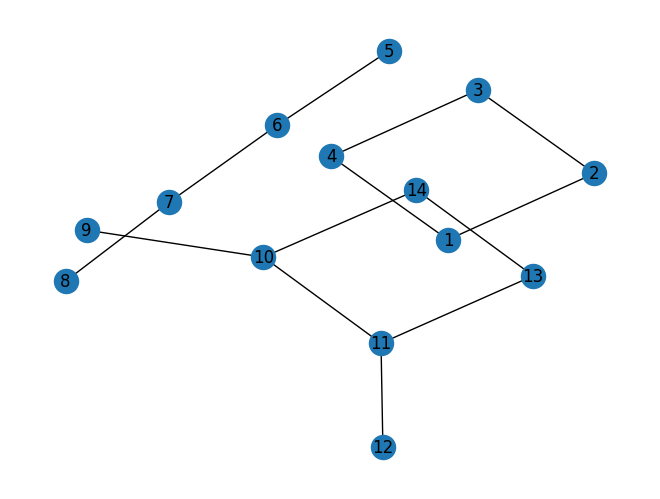

In [119]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1),(5,6),(6,7),(7,8),(9,10),(10,11),(11,12),(11,13),(13,14),(14,10)])
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True)

print(connected_components(G))

## Grafs bipartits

Diem que un graf és __bipartit__ si podem separar els seus nodes en dos grups de manera que els nodes del primer grup només tinguin arestes cap a nodes del segon grup (i viceversa). És a dir, que no existeixin arestes que connectin nodes d'un mateix grup: 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Simple-bipartite-graph.svg" alt="bipartite graph" style="width: 25%" />

Networkx ens permet generar grafs bipartits aleatoris utilitzant la funció `random_graph()` del mòdul _bipartite_. Aquesta funció rep tres paràmetres $n, m, p$ on:
- $n$ és el nombre de nodes del primer grup.
- $m$ és el nombre de nodes del segon grup.
- $p$ és la probabilitat de creació d'arestes (0 per no crear-ne cap i 1 per crear-les totes).

La visualització següent mostra el mateix graf usant dos _layouts_ diferents. La primera figura mostra el layout per defecte on no és fàcil veure si el graf és bipartit o no. En el segon, podem veure clarament els dos grups i com les arestes no connecten nodes d'un mateix grup.

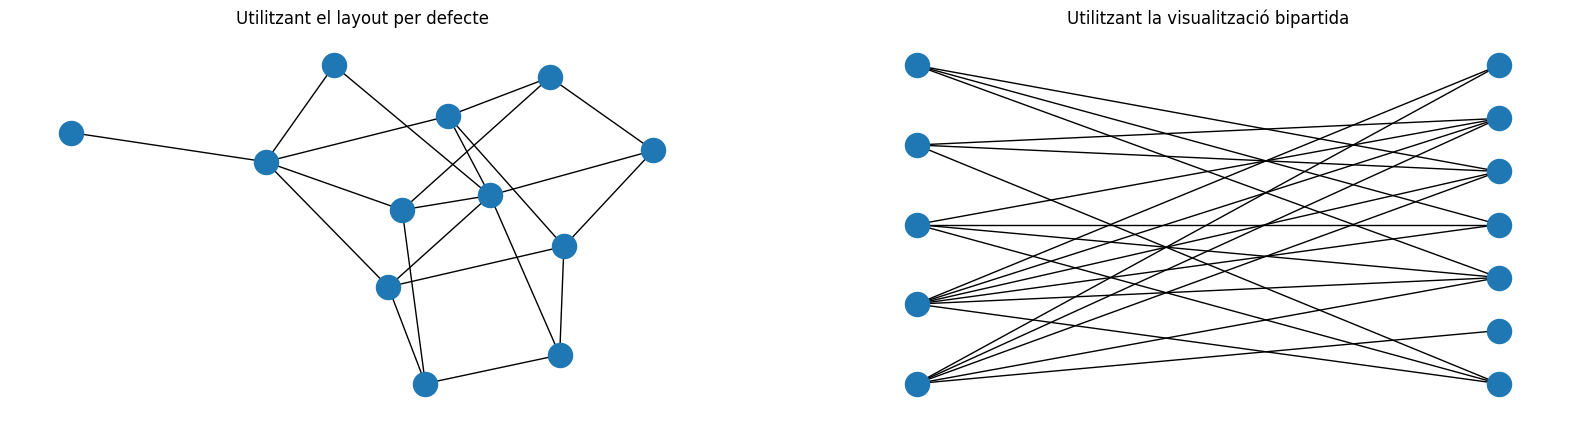

In [76]:
# Generem un graf bipartit connectat (tots els nodes tenen com a mínim una aresta associada)
G = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G = nx.algorithms.bipartite.random_graph(5,7,0.6)

top = nx.bipartite.sets(G)[0]
posbi = nx.bipartite_layout(G, top)

# Mostrem el mateix graf de dues formes diferents
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Utilitzant el layout per defecte')
nx.draw(G, ax=axs[0])

axs[1].set_title('Utilitzant la visualització bipartida')
nx.draw(G, pos=posbi, ax=axs[1])

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu un algorisme per a determinar si un graf és bipartit. Assumirem que el graf està connectat (entre dos nodes qualsevols sempre existeix un camí) i és NO dirigit.
    <ul>
        <li>Podeu utilitzar el diccionari intern de cada node per a guardar-hi informació: <br>$G.nodes[idx][clau]$ on $idx$ és l'index del node i $clau$ és qualsevol paraula que identifica l'atribut del node.
        <li>Podeu usar la funcio 'neighbors' per a retornar els veïns d'un node
        <li>Per a que sigui més senzill, definiu una funció auxiliar que es basi en el DFS per a fer la cerca.
    </ul>
</p>    
    
<p>

</p>
    
</div>

In [77]:
# Generem un graf bipartit
# En aquest problema, ens assegurem que el graf generat no tingui nodes aïllats
G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)

# Al crear un graf bipartit, es crea un atribut anomenat 'bipartite' que pren valors 0 i 1. Els eliminem ja que no els usarem en la nostra solució
for n in G_bi.nodes():
    del G_bi.nodes[n]['bipartite']

In [78]:
# Generem un graf NO bipartit
G_geo = nx.random_geometric_graph(10, 3)

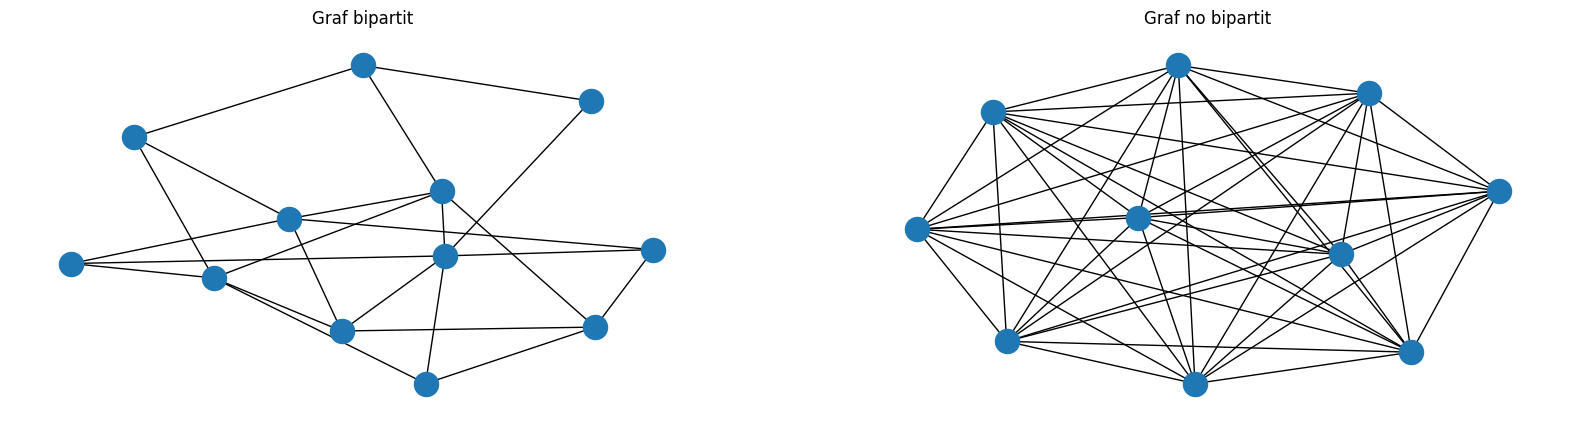

In [79]:
# Mostrem els grafs que hem creat
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Graf bipartit')
nx.draw(G_bi, ax=axs[0])

axs[1].set_title('Graf no bipartit')
nx.draw(G_geo, ax=axs[1])

In [147]:
def asign_group(G, v, group):
    """
    Esta función asigna un grupo a todos los nodos de un grafo de forma recursiva, implementando el algoritmo DFS.

    Args:
        G: Grafo sobre el que se realiza la búsqueda. Es un objeto de tipo networx.Graph.
        v: Nodo inicial.
        group: Grupo actual.
    """
    
    # Comprobamos si el nodo tiene grupo
    if 'group' not in G.nodes[v]:
        G.nodes[v]['group'] = group  # Si no tiene grupo, se lo asignamos

        # Comporbamos los vecinos del nodo actual
        for u in G.neighbors(v):
            # Comrpobamos si el vecino tiene grupo y es igual al nodo actual
            if 'group' in G.nodes[u] and G.nodes[u]['group'] == G.nodes[v]['group']:
                return False
            
            # Asignamos el grupo al vecino de forma recursiva
            asign_group(G, u, group * (-1))
        
    return True

def es_bipartit(G):
    """
    Esta función comprueba si un grafo dado es bipartito o no.

    Args:
        G: Grafo sobre el que se realiza la búsqueda. Es un objeto de tipo networx.Graph.
    
    Returns:
        True si el grafo es bipartito, False en caso contrario.
    """

    source_node = list(G.nodes())[0]  # Escogemos un nodo inicial de forma arbitraria

    # Comprobamos que a todos los nodos se les pueda asignar un grupo para formar un grafo bipartito
    return asign_group(G, 0, source_node)

In [148]:
%timeit es_bipartit(G_bi)

321 ns ± 2.25 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [139]:
print(es_bipartit(G_bi.copy()))
print(es_bipartit(G_geo.copy()))

True
False


<div class="alert alert-success">
<h1>Problema 3</h1>
<p>
    Donada una matriu binària (que només conté zeros i uns) i una casella inicial que conté un 1, implementeu una funció que retorni quants uns són visitables suposant que només ens podem moure cap amunt, cap avall o cap als dos costats.
    Només podem visitar les caselles que contenen uns.
</p>    
    
<p>

</p>
    
</div>

In [155]:
def get_neighbors(G, cell):
    """
    Esta función devuelve los vecinos accesibles a una celda de una matriz. 
    Para que dos celadas sean vecinas, deben compartir un lado (no una esquina).

    Args:
        G: Grafo sobre el que se realiza la búsqueda. Es un objeto de tipo networx.Graph.
        cell: Celda inicial.
    
    Returns:
        neighbors: Lista de vecinos accesibles.
    """

    neighbors = []  # Lista con los vecinos de la celda
    moves = ((1,0),(-1,0),(0,1),(0,-1))  # Tupla con los movimientos posibles (arriba, abajo, derecha, izquierda)

    # Nos movemos desde la celda inicial
    for m in moves:

        # Calculamos la nueva posición
        x, y = cell[0] + m[0], cell[1] + m[1]

        # Comprobamos que el movimiento sea valido
        if x >= 0 and x < len(G) and y >= 0 and y < len(G[0]):
            neighbors.append((x,y))  # Añadimos el vecino a la lista

    return neighbors

def find_visitable_cells(M, cell, visited):
    """
    Esta función implementa el algoritmo de búsqueda en profundida de forma recursiva,
    para visitar todos los vecinos accesibles a una celda de una matriz.

    Args:
        M: Matriz sobre la que se realiza la búsqueda. Listas anidadas de Python.
        v: Celda inicial.
        visited: Conjunto de nodos visitados.
    """

    # Comprobamos que la celda no haya sido visitada y que sea accesible
    if cell not in visited and M[cell[0]][cell[1]] == 1:
        visited.add(cell)  # Añadimos la celda al conjunto de nodos visitados

        # Visitamos los vecinos de forma recursiva
        for neighbor in get_neighbors(M, cell):
            find_visitable_cells(M, neighbor, visited)

def visitable_cells(M, init):
    """
    Esta función devuelve el número de celdas accesibles a partir de una celda inicial de una matriz.

    Args:
        M: Matriz sobre la que se realiza la búsqueda. Listas anidadas de Python.
        init: Celda inicial.
    
    Returns:
        len(visited): Número de celdas accesibles.
    """

    x, y = init  # Obtenemos las coordenadas de la celda inicial
    assert M[x][y] == 1  # Comprobamos que la celda inicial sea accesible

    visited = set()  # Conjunto de nodos visitados
    
    find_visitable_cells(M, init, visited)  # Realizamos la búsqueda en profundidad

    return len(visited)

In [156]:
M = [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]]
init = (1, 1)

for m in M:
    print(m)

visit = visitable_cells(M, init)
print(f"Des de la cel·la {init} es poden visitar {visit} cel·les")

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
Des de la cel·la (1, 1) es poden visitar 23 cel·les


In [96]:
%timeit visitable_cells(M, init)

15.9 µs ± 97.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Flood Fill

L'algorisme __Flood Fill__ (algorisme d'emplenat) és usat per múltiples editors d'imatges com ara __Paint__, __Gimp__ o __Photoshop__ en l'eina __Pot de Pintura (Paint bucket)__ o __Bareta màgica (Magic Wand)__. Aquesta eina, ens permet seleccionar un punt de la imatge (node inicial) del qual se n'agafa el color. A continuació, s'expandeix a tots els nodes veïns del mateix color fins a seleccionar la màxima àrea possible.



Considerant una imatge com un graf on els nodes veïns de cada pixel són els que toquen amb ell, podem aplicar l'algorisme DFS per a implementar el Flood Fill.

<div class="alert alert-success">
<h1>Problema 4</h1>
<p>
    Implementeu l'algorimse <b>Flood Fill</b>. Podeu usar altres imatges per a provar el vostre algorisme. Tingueu en compte que les imatges no poden ser gaire grans ja que se superarien el nombre de recursions que Jupyter permet.
</p>    
    
<p>
Els següents passos us poden servir de guia:
    <ol>
    <li> És un algorimse recursiu ja que cada hem d'anar expandint nodes (píxels) mentre que el color sigui el mateix. Comença definint la condició de parada.
    <li> Per a cada píxel, qui són els seus veïns? Tots els píxels tenen el mateix nombre de veïns?
    </ol>
</p>
<br>
<b>EXTRA</b>: Modifiqueu l'algorísme afegint un nou paràmetre de tolerància entre colors. Podeu fer servir la funció següent per a calcular la distància entre dos colors:

```python
import math
def color_distance(color1, color2):
    # Defineix la distància euclidiana entre dos vectors: 'color1', 'color2'
    return math.sqrt(sum([(c1-c2)**2 for c1, c2 in zip(color1, color2)]))
```
</div>

In [15]:
import sys
# Aquesta instrucció ens permet augmentar el límit de recursions permeses
sys.setrecursionlimit(int(1e9))

In [16]:
from PIL import Image

# Obrim una imatge
image = Image.open('img/map.png').convert('RGB')
width, height = image.size

# Podeu aplicar un factor de reescalat si la imatge és gran
resize_val = 0.5
image = image.resize((int(width*resize_val),int(height*resize_val)))

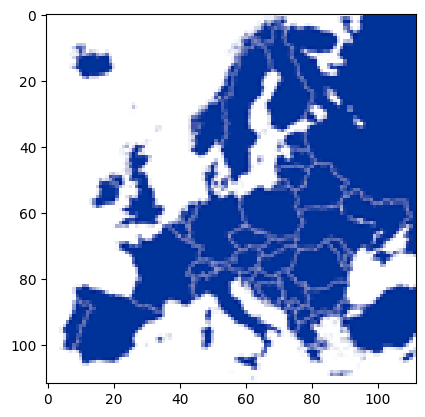

In [17]:
data = np.array(image)
plt.imshow(data)
plt.show()

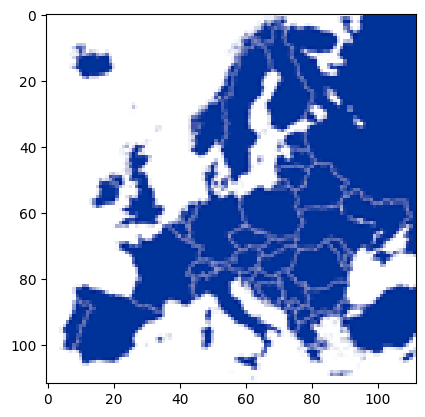

In [18]:
def flood_fill(matrix, start_x, start_y, new_color):
    # Dimensions de la imatge
    width = len(matrix)
    height = len(matrix[0])
    
    def fill(x,y,start_color,color_to_update):
        # EL TEU CODI AQUÍ
        pass

    
    start_color = matrix[start_x][start_y].copy() # Agafem el color de la zona seleccionada
    fill(start_x,start_y,start_color,new_color)   # Fem la primera crida a l'algorisme amb el node inicial


newdata = data.copy()             # Fem una còpia per no modificar la 'data' actual
newcolor = [255,255,0]            # Color (RGB) que usarem per pintar. Són tres valors de 0 a 255. (RGB = Red, Green, Blue)
startpoint = (0, len(newdata)-1)  # Cantonada superior dreta

flood_fill(newdata, startpoint[0], startpoint[1], newcolor)

plt.imshow(newdata)
plt.show()

<div class="alert alert-success">
<h1>Problema 5</h1>
<p>
    Donat un laberint com el que esteu usant a pràctiques, implementeu una funció que comprovi si té solució. La vostra funció ha de retornar True/False indicant si existeix un camí i una llista amb totes els nodes que s'han explorat.
</p>    
    
<p>

</p>
    
</div>

In [19]:
def exist_path(G, source, dest, visited):
    return False, visited

Existeix camí: False


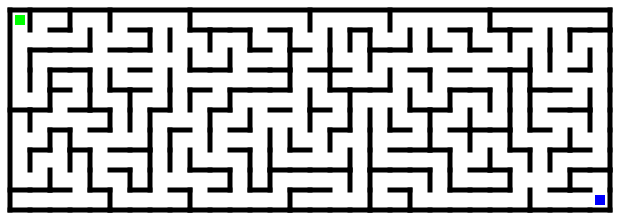

Existeix camí: False


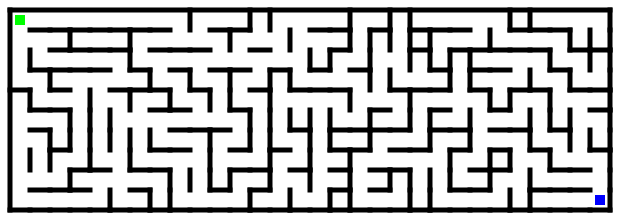

In [20]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from IPython.display import display_html

maze1 = Maze(30, 10, seed=17)
maze2 = Maze(30, 10, seed=15, p_build=0.25)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
for maze in [maze1, maze2]:
    G = maze.maze_graph()

    A = 0
    B = len(G.nodes)-1
    existeix, nodes_explorats = exist_path(G, A, B, set())
    
    print(f"Existeix camí: {existeix}")
    
    # Visualitzem
    maze.set_values(nodes_explorats, 1, color=(255,100,100))
    maze.set_value(A, 1, color=(0,255,0))
    maze.set_value(B, 1, color=(0,0,255))
    
    maze.display_maze(plot_path=True, height=200)